https://dacon.io/competitions/open/235536/data

In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!head movies_train.csv

In [441]:
df = pd.read_csv('movies_train.csv')
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


# train 데이터

## 불필요 컬럼 삭제

In [442]:
df.drop(columns=['title','time','release_time','director'],inplace=True)

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  270 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 37.6+ KB


## 결측치 처리

In [444]:
df.fillna(0, inplace=True )

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  600 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 37.6+ KB


In [446]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,롯데엔터테인먼트,액션,청소년 관람불가,0.00,0,91,2,23398
1,(주)쇼박스,느와르,청소년 관람불가,1161602.50,2,387,3,7072501
2,(주)쇼박스,액션,15세 관람가,220775.25,4,343,4,6959083
3,(주)NEW,코미디,전체 관람가,23894.00,2,20,6,217866
4,쇼박스(주)미디어플렉스,코미디,15세 관람가,1.00,1,251,2,483387


## 카테고리 컬럼 인코딩(추가)

### distributor

In [447]:
#cat.codes = 각 변수를 숫자로 분류
df.distributor = df.distributor.astype('category')
df['distributor_code']= df.distributor.cat.codes

### genre

In [448]:
df.genre = df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

## screening_rat

In [449]:
df.screening_rat = df.screening_rat.astype('category')
df['screening_rat_code'] = df.screening_rat.cat.codes

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   distributor         600 non-null    category
 1   genre               600 non-null    category
 2   screening_rat       600 non-null    category
 3   dir_prev_bfnum      600 non-null    float64 
 4   dir_prev_num        600 non-null    int64   
 5   num_staff           600 non-null    int64   
 6   num_actor           600 non-null    int64   
 7   box_off_num         600 non-null    int64   
 8   distributor_code    600 non-null    int16   
 9   genre_code          600 non-null    int8    
 10  screening_rat_code  600 non-null    int8    
dtypes: category(3), float64(1), int16(1), int64(4), int8(2)
memory usage: 35.2 KB


In [450]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,롯데엔터테인먼트,액션,청소년 관람불가,0.00,0,91,2,23398,80,10,3
1,(주)쇼박스,느와르,청소년 관람불가,1161602.50,2,387,3,7072501,21,2,3
2,(주)쇼박스,액션,15세 관람가,220775.25,4,343,4,6959083,21,10,1
3,(주)NEW,코미디,전체 관람가,23894.00,2,20,6,217866,6,11,2
4,쇼박스(주)미디어플렉스,코미디,15세 관람가,1.00,1,251,2,483387,96,11,1


## shuffle
###frac: row에서 몇%의 데이터를 return할 것인지 정할 수 있다.

###reset_index: 기존의 index가 아닌 새로운 indexing을 가능케한다.

In [451]:
df = df.sample(frac=1).reset_index(drop=True)

In [452]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,드림로드,멜로/로맨스,청소년 관람불가,0.0,0,26,2,1533,75,5,3
1,CJ 엔터테인먼트,SF,청소년 관람불가,57.0,1,162,2,988,51,0,3
2,롯데엔터테인먼트,코미디,12세 관람가,0.0,0,499,5,1717566,80,11,0
3,롯데엔터테인먼트,애니메이션,전체 관람가,0.0,0,36,5,2202788,80,9,2
4,시네마달,다큐멘터리,12세 관람가,0.0,0,8,1,2972,106,3,0


## log 스케일 변환
```
 3   dir_prev_bfnum      600 non-null    float64 
 5   num_staff           600 non-null    int64   
 7   box_off_num         600 non-null    int64   
```

값이 0인 칼럼은 log변환할때 에러가 발생.

numpy.log1p()를 사용하여 값에 1을 더한 후
log변환해 준다.

In [453]:
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   distributor         600 non-null    category
 1   genre               600 non-null    category
 2   screening_rat       600 non-null    category
 3   dir_prev_bfnum      600 non-null    float64 
 4   dir_prev_num        600 non-null    int64   
 5   num_staff           600 non-null    int64   
 6   num_actor           600 non-null    int64   
 7   box_off_num         600 non-null    int64   
 8   distributor_code    600 non-null    int16   
 9   genre_code          600 non-null    int8    
 10  screening_rat_code  600 non-null    int8    
 11  dir_prev_bfnum_log  600 non-null    float64 
 12  num_staff_log       600 non-null    float64 
 13  box_off_num_log     600 non-null    float64 
dtypes: category(3), float64(4), int16(1), int64(4), int8(2)
memory usage: 49.2 KB


## Standardization
```
 4   dir_prev_num        600 non-null    int64   
 6   num_actor           600 non-null    int64   
 11  dir_prev_bfnum_log  600 non-null    float64 
 12  num_staff_log       600 non-null    float64 
 13  box_off_num_log     600 non-null    float64 
 ```

In [455]:
df['dir_prev_num'] = df.dir_prev_num.astype(np.float)
df['num_actor'] = df.num_actor.astype(np.float)

df['dir_prev_num'] = (df.dir_prev_num - df.dir_prev_num.mean() ) / df.dir_prev_num.std()
df['num_actor'] = (df.num_actor - df.num_actor.mean() ) / df.num_actor.std()
df['dir_prev_bfnum_log'] = (df.dir_prev_bfnum_log - df.dir_prev_bfnum_log.mean() ) / df.dir_prev_bfnum_log.std()
df['num_staff_log'] = (df.num_staff_log - df.num_staff_log.mean() ) / df.num_staff_log.std()
#df['box_off_num_log'] = (df.box_off_num_log - df.box_off_num_log.mean() ) / df.box_off_num_log.std()

## 데이터 분포 보기

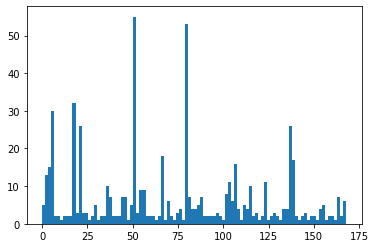

In [456]:
plt.hist(df.distributor_code.to_numpy(), bins= 100)
plt.show()

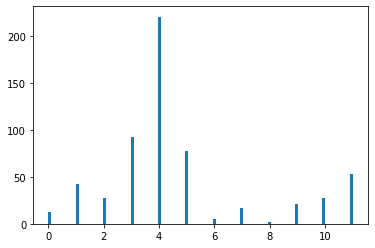

In [457]:
plt.hist(df.genre_code.to_numpy(), bins=100)
plt.show()

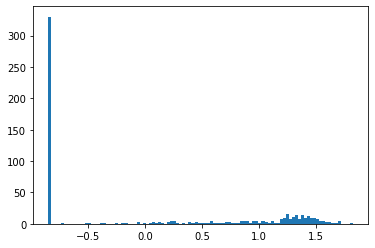

In [375]:
plt.hist(df.dir_prev_bfnum_log.to_numpy(), bins=100)
plt.show()

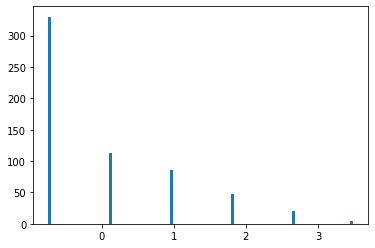

In [376]:
plt.hist(df.dir_prev_num.to_numpy(), bins=100)
plt.show()

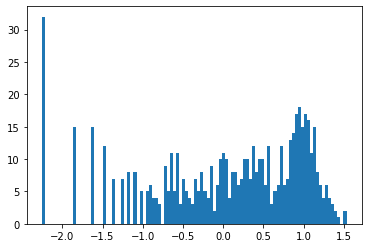

In [377]:
plt.hist(df.num_staff_log.to_numpy(), bins=100)
plt.show()

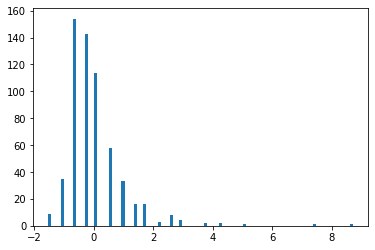

In [378]:
plt.hist(df.num_actor.to_numpy(), bins=100)
plt.show()

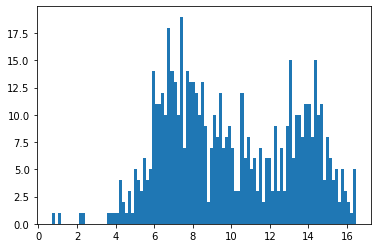

In [379]:
plt.hist(df.box_off_num_log.to_numpy(), bins=100)
plt.show()

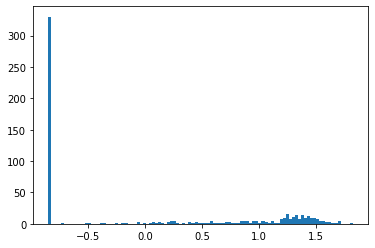

In [380]:
plt.hist(df.dir_prev_bfnum_log.to_numpy(), bins=100)
plt.show()

## one-hot encoding
```
distributor_code
genre_code
screening_rat_code
```
reference : https://blog.naver.com/PostView.nhn?blogId=esak97&logNo=221715216490

In [458]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code,dir_prev_bfnum_log,num_staff_log,box_off_num_log
0,드림로드,멜로/로맨스,청소년 관람불가,0.0,-0.740798,26,-0.697484,1533,75,5,3,-0.848308,-0.408219,7.335634
1,CJ 엔터테인먼트,SF,청소년 관람불가,57.0,0.104219,162,-0.697484,988,51,0,3,-0.199111,0.596473,6.896694
2,롯데엔터테인먼트,코미디,12세 관람가,0.0,-0.740798,499,0.528562,1717566,80,11,0,-0.848308,1.222820,14.356419
3,롯데엔터테인먼트,애니메이션,전체 관람가,0.0,-0.740798,36,0.528562,2202788,80,9,2,-0.848308,-0.232149,14.605235
4,시네마달,다큐멘터리,12세 관람가,0.0,-0.740798,8,-1.106166,2972,106,3,0,-0.848308,-1.022135,7.997327


In [459]:
df= pd.get_dummies(df, columns= ['distributor_code'])
df= pd.get_dummies(df, columns= ['genre_code'])
df= pd.get_dummies(df, columns= ['screening_rat_code'])

## 불필요한 컬럼 삭제
```
 0   distributor         600 non-null    category
 1   genre               600 non-null    category
 2   screening_rat       600 non-null    category
 3   dir_prev_bfnum      600 non-null    float64 
 5   num_staff           600 non-null    int64     
```

In [460]:
df.drop(columns=["distributor", 
                 "genre", 
                 "screening_rat", 
                 "dir_prev_bfnum", 
                 "num_staff"], inplace=True)

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 191 entries, dir_prev_num to screening_rat_code_3
dtypes: float64(5), int64(1), uint8(185)
memory usage: 136.6 KB


## x,y numpy로
###x,y 추려내기

In [462]:
# y = df.box_off_num.to_numpy()
y = df.box_off_num_log.to_numpy()
df.drop(columns=['box_off_num', 'box_off_num_log'], inplace=True)

x = df.to_numpy()

In [463]:
print(x.shape)
print(y.shape)

(600, 189)
(600,)


## train/test 분리

In [465]:
i = int(len(x)*0.8)
train_x, test_x =x[:i],x[i:]
train_y, test_y =y[:i],y[i:]

# 딥러닝 학습

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 10)                1900      
                                                                 
 dense_57 (Dense)            (None, 10)                110       
                                                                 
 dense_58 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


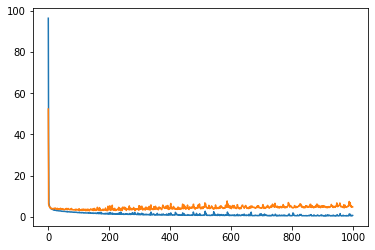

4/4 [==============================] - 0s 4ms/step - loss: 5.0667 - mape: 24.0770 - root_mean_squared_error: 2.2509
loss= 5.066717624664307
mape= 24.076997756958008
rmse= 2.250936985015869


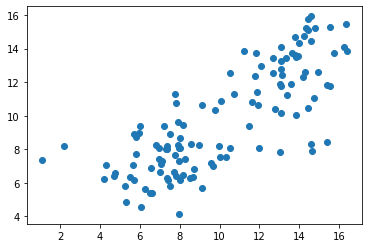

In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape", RootMeanSquaredError()])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape, rmse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)
print("rmse=", rmse)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

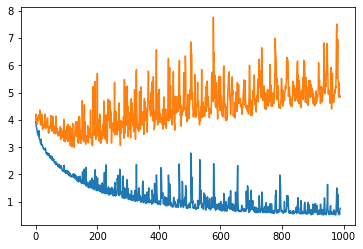

In [467]:
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.show()

In [468]:
predicted = np.exp(y_)
org_test_y = np.exp(test_y)

rmse = RootMeanSquaredError()
result_rmse = rmse(predicted, org_test_y)
print(result_rmse)

tf.Tensor(2081996.4, shape=(), dtype=float32)


#Test 데이타

In [469]:
train_df = pd.read_csv('movies_train.csv')

In [470]:
df = pd.read_csv('movies_test.csv')
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [471]:
train_data_count = len(train_df)
test_data_count = len(df)

print(train_data_count)
print(test_data_count)

600
243


In [335]:
df = pd.concat([train_df, df])

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


## dummy y 컬럼 추가

In [477]:
df['box_off_num'] = df.dir_prev_num

## 불필요 컬럼 삭제

In [478]:
df.drop(columns=['title','release_time','director','time'], inplace= True)

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     243 non-null    object 
 1   genre           243 non-null    object 
 2   screening_rat   243 non-null    object 
 3   dir_prev_bfnum  107 non-null    float64
 4   dir_prev_num    243 non-null    int64  
 5   num_staff       243 non-null    int64  
 6   num_actor       243 non-null    int64  
 7   box_off_num     243 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.3+ KB


## 결측치 처리

In [482]:
df.fillna(0, inplace=True)

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     243 non-null    object 
 1   genre           243 non-null    object 
 2   screening_rat   243 non-null    object 
 3   dir_prev_bfnum  243 non-null    float64
 4   dir_prev_num    243 non-null    int64  
 5   num_staff       243 non-null    int64  
 6   num_actor       243 non-null    int64  
 7   box_off_num     243 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.3+ KB


## 카테고리 컬럼 인코딩

### distributor

In [486]:
df.distributor = df.distributor.astype('category')
df['distributor_code'] = df.distributor.cat.codes 

### genre

In [488]:
df.genre = df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

### screening_cat

In [490]:
df.screening_rat = df.screening_rat.astype('category')
df['screening_rat_code'] = df.screening_rat.cat.codes

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   distributor         243 non-null    category
 1   genre               243 non-null    category
 2   screening_rat       243 non-null    category
 3   dir_prev_bfnum      243 non-null    float64 
 4   dir_prev_num        243 non-null    int64   
 5   num_staff           243 non-null    int64   
 6   num_actor           243 non-null    int64   
 7   box_off_num         243 non-null    int64   
 8   distributor_code    243 non-null    int8    
 9   genre_code          243 non-null    int8    
 10  screening_rat_code  243 non-null    int8    
dtypes: category(3), float64(1), int64(4), int8(3)
memory usage: 14.9 KB


In [494]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,시네마서비스,느와르,청소년 관람불가,3.005290e+05,2,304,3,2,64,2,3
1,(주)쇼박스,멜로/로맨스,12세 관람가,3.427002e+05,4,275,3,4,16,5,0
2,CJ 엔터테인먼트,드라마,12세 관람가,4.206611e+06,3,419,7,3,29,4,0
3,(주)쇼박스,액션,15세 관람가,6.913420e+05,2,408,2,2,16,10,1
4,CJ 엔터테인먼트,공포,15세 관람가,3.173800e+04,1,380,1,1,29,1,1


##shuffle

In [496]:
#df = df.sample(frac=1).reset_index(drop=True)
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,시네마서비스,느와르,청소년 관람불가,3.005290e+05,2,304,3,2,64,2,3
1,(주)쇼박스,멜로/로맨스,12세 관람가,3.427002e+05,4,275,3,4,16,5,0
2,CJ 엔터테인먼트,드라마,12세 관람가,4.206611e+06,3,419,7,3,29,4,0
3,(주)쇼박스,액션,15세 관람가,6.913420e+05,2,408,2,2,16,10,1
4,CJ 엔터테인먼트,공포,15세 관람가,3.173800e+04,1,380,1,1,29,1,1


## log 스케일 변환
```
 3   dir_prev_bfnum      600 non-null    float64 
 5   num_staff           600 non-null    int64   
 7   box_off_num         600 non-null    int64   
```

값이 0인 컬럼은 log변환할때 에러 발생한다.

numpy.log1p()를 사용하여 값에 1을 더한후 log 변환해 준다.

In [499]:
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   distributor         243 non-null    category
 1   genre               243 non-null    category
 2   screening_rat       243 non-null    category
 3   dir_prev_bfnum      243 non-null    float64 
 4   dir_prev_num        243 non-null    int64   
 5   num_staff           243 non-null    int64   
 6   num_actor           243 non-null    int64   
 7   box_off_num         243 non-null    int64   
 8   distributor_code    243 non-null    int8    
 9   genre_code          243 non-null    int8    
 10  screening_rat_code  243 non-null    int8    
 11  dir_prev_bfnum_log  243 non-null    float64 
 12  num_staff_log       243 non-null    float64 
 13  box_off_num_log     243 non-null    float64 
dtypes: category(3), float64(4), int64(4), int8(3)
memory usage: 20.6 KB


##Standardization
```
 4   dir_prev_num        600 non-null    int64   
 6   num_actor           600 non-null    int64   
 11  dir_prev_bfnum_log  600 non-null    float64 
 12  num_staff_log       600 non-null    float64 
 13  box_off_num_log     600 non-null    float64 
 ```

In [503]:
df['dir_prev_num'] = df.dir_prev_num.astype(np.float)
df['num_actor'] = df.num_actor.astype(np.float)

df['dir_prev_num'] = (df.dir_prev_num - df.dir_prev_num.mean() ) / df.dir_prev_num.std()
df['num_actor'] = (df.num_actor - df.num_actor.mean() ) / df.num_actor.std()
df['dir_prev_bfnum_log'] = (df.dir_prev_bfnum_log - df.dir_prev_bfnum_log.mean() ) / df.dir_prev_bfnum_log.std()
df['num_staff_log'] = (df.num_staff_log - df.num_staff_log.mean() ) / df.num_staff_log.std()
#df['box_off_num_log'] = (df.box_off_num_log - df.box_off_num_log.mean() ) / df.box_off_num_log.std()

##one-hot encoding
```
distributor_code
genre_code
screening_rat_code
```

In [505]:
df = pd.get_dummies(df, columns= ['genre_code'])
df = pd.get_dummies(df, columns= ['screening_rat_code'])
df = pd.get_dummies(df, columns = ['distributor_code'])

KeyError: ignored

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Columns: 120 entries, distributor to distributor_code_92
dtypes: category(3), float64(6), int64(2), uint8(109)
memory usage: 45.7 KB


## 불필요한 컬럼 삭제
```
 0   distributor         600 non-null    category
 1   genre               600 non-null    category
 2   screening_rat       600 non-null    category
 3   dir_prev_bfnum      600 non-null    float64 
 5   num_staff           600 non-null    int64     
```

In [509]:
df.drop(columns=["distributor", 
                 "genre", 
                 "screening_rat", 
                 "dir_prev_bfnum", 
                 "num_staff"], inplace=True)

KeyError: ignored

##x,y numpy로

In [512]:
y = df.box_off_num_log.to_numpy()
df.drop(columns=['box_off_num', 'box_off_num_log'], inplace=True)

x = df.to_numpy()

AttributeError: ignored

In [511]:
print(x.shape)
print(y.shape)

(243, 113)
(243,)


## 예측

In [513]:
test_x = x

In [353]:
y = model.predict(test_x)
y_ = np.exp(y)

ValueError: ignored

In [ ]:
!head -3 movies_train.csv
!head -3 movies_test.csv